In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
crime = pd.read_csv('Crimes_-_2001_to_Present.csv')
crime.head()

ID Case Number                    Date                  Block  IUCR  \
0  10224738    HY411648  09/05/2015 01:30:00 PM        043XX S WOOD ST  0486   
1  10224739    HY411615  09/04/2015 11:30:00 AM    008XX N CENTRAL AVE  0870   
2  11646166    JC213529  09/01/2018 12:01:00 AM  082XX S INGLESIDE AVE  0810   
3  10224740    HY411595  09/05/2015 12:45:00 PM      035XX W BARRY AVE  2023   
4  10224741    HY411610  09/05/2015 01:00:00 PM    0000X N LARAMIE AVE  0560   

  Primary Type              Description Location Description  Arrest  \
0      BATTERY  DOMESTIC BATTERY SIMPLE            RESIDENCE   False   
1        THEFT           POCKET-PICKING              CTA BUS   False   
2        THEFT                OVER $500            RESIDENCE   False   
3    NARCOTICS    POSS: HEROIN(BRN/TAN)             SIDEWALK    True   
4      ASSAULT                   SIMPLE            APARTMENT   False   

   Domestic  ...  Ward  Community Area  FBI Code  X Coordinate Y Coordinate  \
0      True  ...  12.0            61.0       08B     1165074.0    1875917.0   
1     False  ...  29.0            25.0        06     1138875.0    1904869.0   
2      True  ...   8.0            44.0        06           NaN          NaN   
3     False  ...  35.0            21.0        18     1152037.0    1920384.0   
4      True  ...  28.0            25.0       08A     1141706.0    1900086.0   

   Year              Updated On   Latitude  Longitude  \
0  2015  02/10/2018 03:50:01 PM  41.815117 -87.670000   
1  2015  02/10/2018 03:50:01 PM  41.895080 -87.765400   
2  2018  04/06/2019 04:04:43 PM        NaN        NaN   
3  2015  02/10/2018 03:50:01 PM  41.937406 -87.716650   
4  2015  02/10/2018 03:50:01 PM  41.881903 -87.755121   

                        Location  
0  (41.815117282, -87.669999562)  
1  (41.895080471, -87.765400451)  
2                            NaN  
3  (41.937405765, -87.716649687)  
4  (41.881903443, -87.755121152)  

[5 rows x 22 columns]

In [3]:
#pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [ ]:
crime.Description.value_counts()

In [ ]:
crime.columns

In [ ]:
crime.head()

In [4]:
# rename some columns 
crime = crime.rename(columns={'Case Number': 'Case_num', 'Primary Type': 'Primary_type', 'Location Description': 'Location_desc', 'Community Area': 'Community_Area', 'FBI Code': 'FBI_Code', 'Updated On': 'Updated_On'})
crime.head()


ID  Case_num                    Date                  Block  IUCR Primary_type              Description Location_desc  Arrest  Domestic  Beat  District  Ward  Community_Area FBI_Code  X Coordinate  Y Coordinate  Year              Updated_On   Latitude  Longitude                       Location
0  10224738  HY411648  09/05/2015 01:30:00 PM        043XX S WOOD ST  0486      BATTERY  DOMESTIC BATTERY SIMPLE     RESIDENCE   False      True   924       9.0  12.0            61.0      08B     1165074.0     1875917.0  2015  02/10/2018 03:50:01 PM  41.815117 -87.670000  (41.815117282, -87.669999562)
1  10224739  HY411615  09/04/2015 11:30:00 AM    008XX N CENTRAL AVE  0870        THEFT           POCKET-PICKING       CTA BUS   False     False  1511      15.0  29.0            25.0       06     1138875.0     1904869.0  2015  02/10/2018 03:50:01 PM  41.895080 -87.765400  (41.895080471, -87.765400451)
2  11646166  JC213529  09/01/2018 12:01:00 AM  082XX S INGLESIDE AVE  0810        THEFT                OVER $500     RESIDENCE   False      True   631       6.0   8.0            44.0       06           NaN           NaN  2018  04/06/2019 04:04:43 PM        NaN        NaN                            NaN
3  10224740  HY411595  09/05/2015 12:45:00 PM      035XX W BARRY AVE  2023    NARCOTICS    POSS: HEROIN(BRN/TAN)      SIDEWALK    True     False  1412      14.0  35.0            21.0       18     1152037.0     1920384.0  2015  02/10/2018 03:50:01 PM  41.937406 -87.716650  (41.937405765, -87.716649687)
4  10224741  HY411610  09/05/2015 01:00:00 PM    0000X N LARAMIE AVE  0560      ASSAULT                   SIMPLE     APARTMENT   False      True  1522      15.0  28.0            25.0      08A     1141706.0     1900086.0  2015  02/10/2018 03:50:01 PM  41.881903 -87.755121  (41.881903443, -87.755121152)

In [ ]:
crime.Primary_type.info()

In [5]:
crime.Date = pd.to_datetime(crime.Date, format = '%m/%d/%Y %I:%M:%S %p')
crime.index = pd.DatetimeIndex(crime.Date)

In [8]:
crime.head()

ID  Case_num                Date                  Block  IUCR Primary_type              Description Location_desc  Arrest  Domestic  Beat  District  Ward  Community_Area FBI_Code  X Coordinate  Y Coordinate  Year              Updated_On   Latitude  Longitude                       Location
Date                                                                                                                                                                                                                                                                                                                        
2015-09-05 13:30:00  10224738  HY411648 2015-09-05 13:30:00        043XX S WOOD ST  0486      BATTERY  DOMESTIC BATTERY SIMPLE     RESIDENCE   False      True   924       9.0  12.0            61.0      08B     1165074.0     1875917.0  2015  02/10/2018 03:50:01 PM  41.815117 -87.670000  (41.815117282, -87.669999562)
2015-09-04 11:30:00  10224739  HY411615 2015-09-04 11:30:00    008XX N CENTRAL AVE  0870        THEFT           POCKET-PICKING       CTA BUS   False     False  1511      15.0  29.0            25.0       06     1138875.0     1904869.0  2015  02/10/2018 03:50:01 PM  41.895080 -87.765400  (41.895080471, -87.765400451)
2018-09-01 00:01:00  11646166  JC213529 2018-09-01 00:01:00  082XX S INGLESIDE AVE  0810        THEFT                OVER $500     RESIDENCE   False      True   631       6.0   8.0            44.0       06           NaN           NaN  2018  04/06/2019 04:04:43 PM        NaN        NaN                            NaN
2015-09-05 12:45:00  10224740  HY411595 2015-09-05 12:45:00      035XX W BARRY AVE  2023    NARCOTICS    POSS: HEROIN(BRN/TAN)      SIDEWALK    True     False  1412      14.0  35.0            21.0       18     1152037.0     1920384.0  2015  02/10/2018 03:50:01 PM  41.937406 -87.716650  (41.937405765, -87.716649687)
2015-09-05 13:00:00  10224741  HY411610 2015-09-05 13:00:00    0000X N LARAMIE AVE  0560      ASSAULT                   SIMPLE     APARTMENT   False      True  1522      15.0  28.0            25.0      08A     1141706.0     1900086.0  2015  02/10/2018 03:50:01 PM  41.881903 -87.755121  (41.881903443, -87.755121152)

In [7]:
crime['Primary_type'] = pd.Categorical(crime['Primary_type'])
crime['Description'] = pd.Categorical(crime['Description'])
crime['Location_desc'] = pd.Categorical(crime['Location_desc'])

In [9]:
count = crime[['Primary_type']]

In [10]:
crime_count = pd.DataFrame(count.groupby('Primary_type').size().sort_values(ascending=False).rename('counts').reset_index())
crime_count.head()

Primary_type   counts
0            THEFT  1613528
1          BATTERY  1402115
2  CRIMINAL DAMAGE   872025
3        NARCOTICS   744216
4          ASSAULT   496480

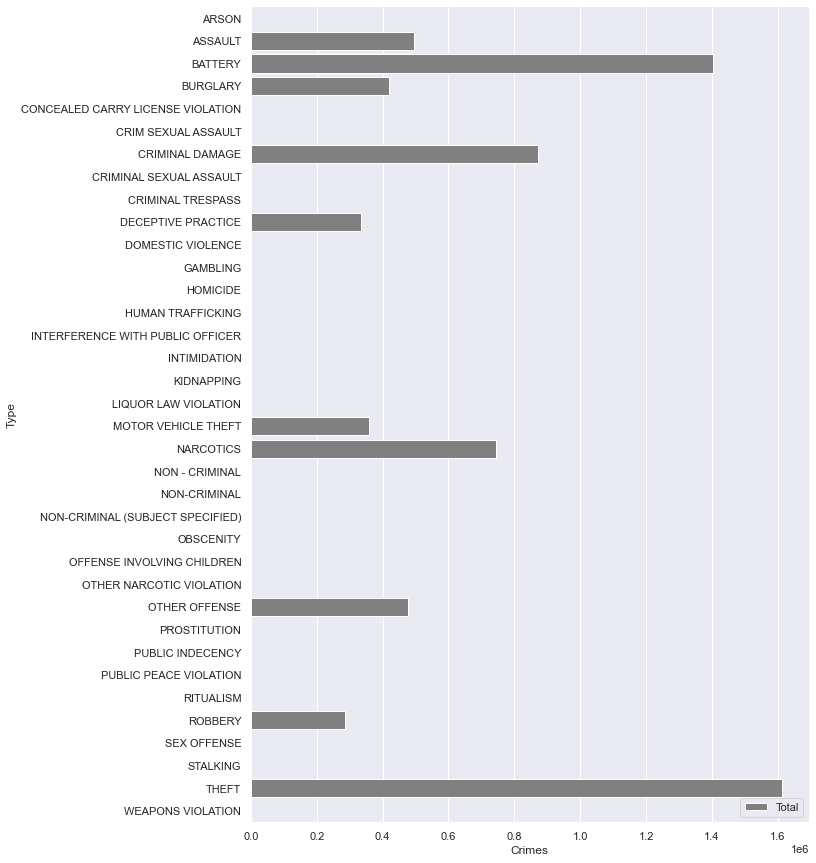

In [11]:
# crime count graph
sns.set(style="darkgrid")

f, ax = plt.subplots(figsize=(10, 15))
sns.set_color_codes("pastel")
sns.barplot(y="Primary_type", x="counts", data=crime_count.iloc[:10, :],label="Total", color="grey")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Type",xlabel="Crimes")
sns.despine(left=True, bottom=True)
plt.show()

In [12]:
b = pd.DataFrame(crime ,columns=['Primary_type','Arrest'])

In [13]:
domestic_count1 = pd.DataFrame(b.groupby(['Primary_type','Arrest']).size().sort_values(ascending=False).rename('counts').reset_index())
domestic_count1


Primary_type  Arrest   counts
0                              THEFT   False  1431175
1                            BATTERY   False  1092361
2                    CRIMINAL DAMAGE   False   812921
3                          NARCOTICS    True   739782
4                           BURGLARY   False   396311
..                               ...     ...      ...
67                         RITUALISM    True        3
68  NON-CRIMINAL (SUBJECT SPECIFIED)    True        3
69                  PUBLIC INDECENCY   False        2
70                 DOMESTIC VIOLENCE    True        1
71                 DOMESTIC VIOLENCE   False        0

[72 rows x 3 columns]

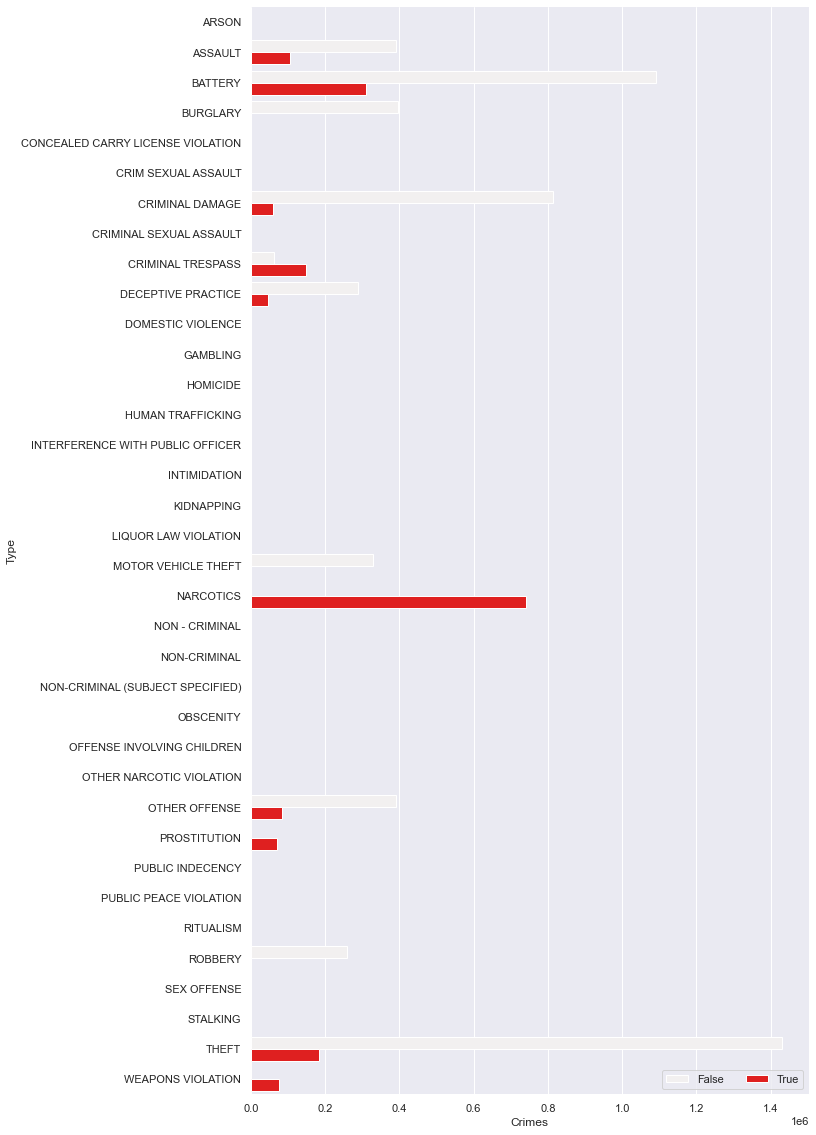

In [14]:
# bar chart to show arrest for crimes 
f, ax = plt.subplots(figsize=(10,20))

# Plot the total crashes
sns.set_color_codes("deep")
sns.barplot( y="Primary_type",x="counts" , data=domestic_count1.iloc[:20, :], hue='Arrest', color='red')

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Type",xlabel="Crimes")
sns.despine(left=True, bottom=True)

### how often do domestic cases end in an arrest?

There are a total of 7,650,199 domestic cases in this dataset, out of all of those 199,064 end in an arrest

In [15]:
# make boolean column if domestic case results in arrest 
crime['domestic_arrest'] = (crime['Domestic']== True) & (crime['Arrest']== True)
crime.head()

ID  Case_num                Date                  Block  IUCR Primary_type              Description Location_desc  Arrest  Domestic  Beat  District  Ward  Community_Area FBI_Code  X Coordinate  Y Coordinate  Year              Updated_On   Latitude  Longitude                       Location  domestic_arrest
Date                                                                                                                                                                                                                                                                                                                                         
2015-09-05 13:30:00  10224738  HY411648 2015-09-05 13:30:00        043XX S WOOD ST  0486      BATTERY  DOMESTIC BATTERY SIMPLE     RESIDENCE   False      True   924       9.0  12.0            61.0      08B     1165074.0     1875917.0  2015  02/10/2018 03:50:01 PM  41.815117 -87.670000  (41.815117282, -87.669999562)            False
2015-09-04 11:30:00  10224739  HY411615 2015-09-04 11:30:00    008XX N CENTRAL AVE  0870        THEFT           POCKET-PICKING       CTA BUS   False     False  1511      15.0  29.0            25.0       06     1138875.0     1904869.0  2015  02/10/2018 03:50:01 PM  41.895080 -87.765400  (41.895080471, -87.765400451)            False
2018-09-01 00:01:00  11646166  JC213529 2018-09-01 00:01:00  082XX S INGLESIDE AVE  0810        THEFT                OVER $500     RESIDENCE   False      True   631       6.0   8.0            44.0       06           NaN           NaN  2018  04/06/2019 04:04:43 PM        NaN        NaN                            NaN            False
2015-09-05 12:45:00  10224740  HY411595 2015-09-05 12:45:00      035XX W BARRY AVE  2023    NARCOTICS    POSS: HEROIN(BRN/TAN)      SIDEWALK    True     False  1412      14.0  35.0            21.0       18     1152037.0     1920384.0  2015  02/10/2018 03:50:01 PM  41.937406 -87.716650  (41.937405765, -87.716649687)            False
2015-09-05 13:00:00  10224741  HY411610 2015-09-05 13:00:00    0000X N LARAMIE AVE  0560      ASSAULT                   SIMPLE     APARTMENT   False      True  1522      15.0  28.0            25.0      08A     1141706.0     1900086.0  2015  02/10/2018 03:50:01 PM  41.881903 -87.755121  (41.881903443, -87.755121152)            False

In [16]:
crime.domestic_arrest.value_counts()

False    7451135
True      199064
Name: domestic_arrest, dtype: int64

In [ ]:
crime.Domestic.count()

In [ ]:
crime.head()

narcotics have 744,216 and out of those 739,782 arrests 

In [17]:
crime['narco_arrest'] = np.where((crime['Primary_type'] == 'NARCOTICS') & (
    crime['Arrest'] == True), 1, 0)

In [ ]:
crime.narco_arrest.value_counts()

How many beats per community area?

In [18]:
crime.Beat.nunique()

304

In [19]:
crime.head()

ID  Case_num                Date                  Block  IUCR Primary_type              Description Location_desc  Arrest  Domestic  Beat  District  Ward  Community_Area FBI_Code  X Coordinate  Y Coordinate  Year              Updated_On   Latitude  Longitude                       Location  domestic_arrest  narco_arrest
Date                                                                                                                                                                                                                                                                                                                                                       
2015-09-05 13:30:00  10224738  HY411648 2015-09-05 13:30:00        043XX S WOOD ST  0486      BATTERY  DOMESTIC BATTERY SIMPLE     RESIDENCE   False      True   924       9.0  12.0            61.0      08B     1165074.0     1875917.0  2015  02/10/2018 03:50:01 PM  41.815117 -87.670000  (41.815117282, -87.669999562)            False             0
2015-09-04 11:30:00  10224739  HY411615 2015-09-04 11:30:00    008XX N CENTRAL AVE  0870        THEFT           POCKET-PICKING       CTA BUS   False     False  1511      15.0  29.0            25.0       06     1138875.0     1904869.0  2015  02/10/2018 03:50:01 PM  41.895080 -87.765400  (41.895080471, -87.765400451)            False             0
2018-09-01 00:01:00  11646166  JC213529 2018-09-01 00:01:00  082XX S INGLESIDE AVE  0810        THEFT                OVER $500     RESIDENCE   False      True   631       6.0   8.0            44.0       06           NaN           NaN  2018  04/06/2019 04:04:43 PM        NaN        NaN                            NaN            False             0
2015-09-05 12:45:00  10224740  HY411595 2015-09-05 12:45:00      035XX W BARRY AVE  2023    NARCOTICS    POSS: HEROIN(BRN/TAN)      SIDEWALK    True     False  1412      14.0  35.0            21.0       18     1152037.0     1920384.0  2015  02/10/2018 03:50:01 PM  41.937406 -87.716650  (41.937405765, -87.716649687)            False             1
2015-09-05 13:00:00  10224741  HY411610 2015-09-05 13:00:00    0000X N LARAMIE AVE  0560      ASSAULT                   SIMPLE     APARTMENT   False      True  1522      15.0  28.0            25.0      08A     1141706.0     1900086.0  2015  02/10/2018 03:50:01 PM  41.881903 -87.755121  (41.881903443, -87.755121152)            False             0

In [ ]:
crime.isnull().sum()

### How often do Crimes occur?

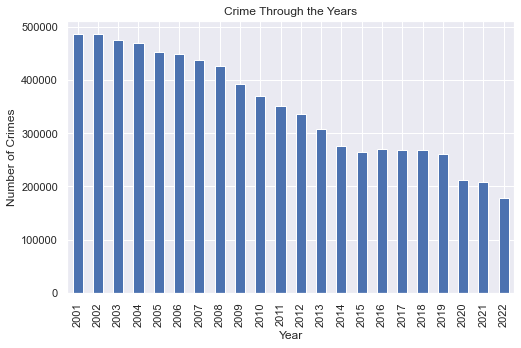

In [20]:
plt.figure(figsize = (8,5))
crime.groupby([crime.index.year]).size().plot.bar()
plt.title('Crime Through the Years')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.show()

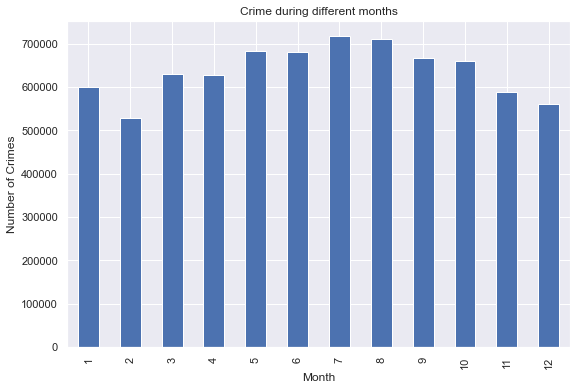

In [21]:
plt.figure(figsize = (9,6))
crime.groupby([crime.index.month]).size().plot.bar()
plt.title('Crime during different months')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.show()

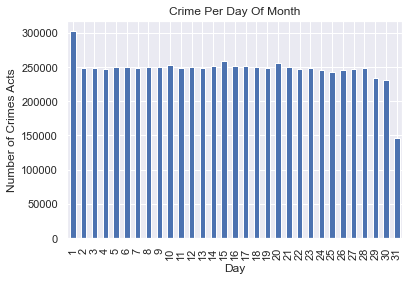

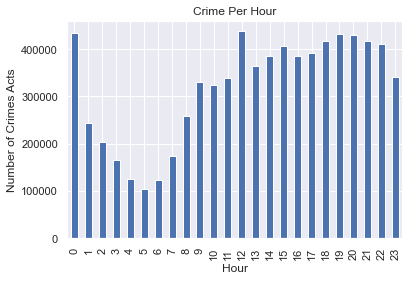

In [22]:
crime.groupby([crime.index.day]).size().plot.bar()
plt.title('Crime Per Day Of Month')
plt.xlabel('Day')
plt.ylabel('Number of Crimes Acts')
plt.show()

crime.groupby([crime.index.hour]).size().plot.bar()
plt.title('Crime Per Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Crimes Acts')
plt.show()

In [23]:
crime_2012 = crime.loc['2012']
crime_2013 = crime.loc['2013']
crime_2014 = crime.loc['2014']
crime_2015 = crime.loc['2015']
crime_2016 = crime.loc['2016']
crime_2017 = crime.loc['2017']
arrest_yearly = crime[crime['Arrest'] == True]['Arrest']

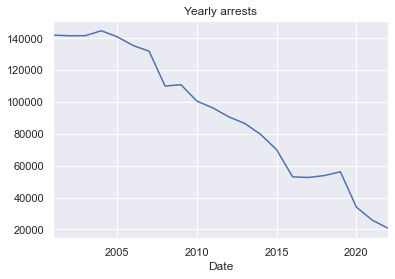

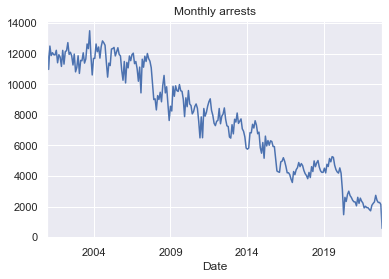

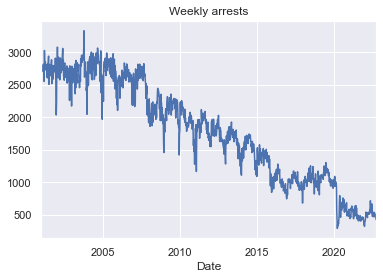

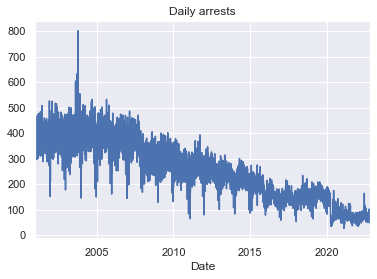

In [24]:
plt.subplot()

# yearly arrest
arrest_yearly.resample('A').sum().plot()
plt.title('Yearly arrests')
plt.show()

# monthly arrest
arrest_yearly.resample('M').sum().plot()
plt.title('Monthly arrests')
plt.show()

# weekly arrest
arrest_yearly.resample('W').sum().plot()
plt.title('Weekly arrests')
plt.show()

# daily arrest
arrest_yearly.resample('D').sum().plot()
plt.title('Daily arrests')
plt.show()
plt.show()

You can see a dip in crimes for 2020 when covid started and a spike in crimes in 2003

In [25]:
# daily arrest
arrest_yearly.resample('D').sum().nlargest(10)

Date
2003-10-16    801
2003-10-17    736
2003-09-23    632
2003-08-21    604
2003-10-02    565
2003-11-30    554
2003-08-29    551
2003-09-06    551
2004-09-16    532
2005-08-25    532
Name: Arrest, dtype: int64

In [26]:
crime.head()

ID  Case_num                Date                  Block  IUCR Primary_type              Description Location_desc  Arrest  Domestic  Beat  District  Ward  Community_Area FBI_Code  X Coordinate  Y Coordinate  Year              Updated_On   Latitude  Longitude                       Location  domestic_arrest  narco_arrest
Date                                                                                                                                                                                                                                                                                                                                                       
2015-09-05 13:30:00  10224738  HY411648 2015-09-05 13:30:00        043XX S WOOD ST  0486      BATTERY  DOMESTIC BATTERY SIMPLE     RESIDENCE   False      True   924       9.0  12.0            61.0      08B     1165074.0     1875917.0  2015  02/10/2018 03:50:01 PM  41.815117 -87.670000  (41.815117282, -87.669999562)            False             0
2015-09-04 11:30:00  10224739  HY411615 2015-09-04 11:30:00    008XX N CENTRAL AVE  0870        THEFT           POCKET-PICKING       CTA BUS   False     False  1511      15.0  29.0            25.0       06     1138875.0     1904869.0  2015  02/10/2018 03:50:01 PM  41.895080 -87.765400  (41.895080471, -87.765400451)            False             0
2018-09-01 00:01:00  11646166  JC213529 2018-09-01 00:01:00  082XX S INGLESIDE AVE  0810        THEFT                OVER $500     RESIDENCE   False      True   631       6.0   8.0            44.0       06           NaN           NaN  2018  04/06/2019 04:04:43 PM        NaN        NaN                            NaN            False             0
2015-09-05 12:45:00  10224740  HY411595 2015-09-05 12:45:00      035XX W BARRY AVE  2023    NARCOTICS    POSS: HEROIN(BRN/TAN)      SIDEWALK    True     False  1412      14.0  35.0            21.0       18     1152037.0     1920384.0  2015  02/10/2018 03:50:01 PM  41.937406 -87.716650  (41.937405765, -87.716649687)            False             1
2015-09-05 13:00:00  10224741  HY411610 2015-09-05 13:00:00    0000X N LARAMIE AVE  0560      ASSAULT                   SIMPLE     APARTMENT   False      True  1522      15.0  28.0            25.0      08A     1141706.0     1900086.0  2015  02/10/2018 03:50:01 PM  41.881903 -87.755121  (41.881903443, -87.755121152)            False             0

In [28]:
# look at the date of the spikes 
df2 = crime.loc['2003-10-16':'2003-10-17']
df2.head()

ID  Case_num                Date                          Block  IUCR   Primary_type              Description                    Location_desc  Arrest  Domestic  Beat  District  Ward  Community_Area FBI_Code  X Coordinate  Y Coordinate  Year              Updated_On   Latitude  Longitude                       Location  domestic_arrest  narco_arrest
Date                                                                                                                                                                                                                                                                                                                                                                                   
2003-10-16 20:28:00  2997131  HJ699791 2003-10-16 20:28:00  014XX N LUIS MUNOZ MARIN DR E  0820          THEFT           $500 AND UNDER                    PARK PROPERTY   False     False  1423      14.0  26.0            24.0       06           NaN           NaN  2003  08/17/2015 03:03:40 PM        NaN        NaN                            NaN            False             0
2003-10-16 01:30:00  2993866  HJ696108 2003-10-16 01:30:00              045XX S UNION AVE  2830  OTHER OFFENSE  OBSCENE TELEPHONE CALLS                        APARTMENT   False     False   935       9.0  11.0            61.0       17     1172391.0     1874768.0  2003  02/10/2018 03:50:01 PM  41.811806 -87.643194  (41.811806184, -87.643193608)            False             0
2003-10-16 00:46:00  2993881  HJ696099 2003-10-16 00:46:00               064XX N CLARK ST  1025          ARSON               AGGRAVATED  POLICE FACILITY/VEH PARKING LOT   False     False  2432      24.0  40.0             1.0       09     1164254.0     1943116.0  2003  02/28/2018 03:56:25 PM  41.999533 -87.671104  (41.999533347, -87.671104423)            False             0
2003-10-16 02:09:00  2993884  HJ696088 2003-10-16 02:09:00              0000X W GOETHE ST  2820  OTHER OFFENSE         TELEPHONE THREAT                            OTHER   False     False  1824      18.0  42.0             8.0       26     1175560.0     1909045.0  2003  02/28/2018 03:56:25 PM  41.905794 -87.630541   (41.90579423, -87.630540772)            False             0
2003-10-16 00:06:56  2993892  HJ695962 2003-10-16 00:06:56           009XX W WAVELAND AVE  0460        BATTERY                   SIMPLE                         SIDEWALK    True     False  2324      19.0  44.0             6.0      08B     1169143.0     1924759.0  2003  02/10/2018 03:50:01 PM  41.949056 -87.653655  (41.949056076, -87.653654947)            False             0

In [29]:
df2.Primary_type.value_counts()

NARCOTICS                            1085
THEFT                                 611
BATTERY                               471
CRIMINAL DAMAGE                       313
ASSAULT                               160
BURGLARY                              151
OTHER OFFENSE                         150
ROBBERY                               115
MOTOR VEHICLE THEFT                   107
DECEPTIVE PRACTICE                     87
CRIMINAL TRESPASS                      70
PROSTITUTION                           36
WEAPONS VIOLATION                      22
PUBLIC PEACE VIOLATION                 14
SEX OFFENSE                            12
OFFENSE INVOLVING CHILDREN             10
LIQUOR LAW VIOLATION                   10
CRIM SEXUAL ASSAULT                     8
ARSON                                   6
HOMICIDE                                5
INTIMIDATION                            3
STALKING                                2
INTERFERENCE WITH PUBLIC OFFICER        2
GAMBLING                          

In [30]:
# look at the date of the spikes 
df3 = crime.loc['2003-10-16']
df3.head()

ID  Case_num                Date                          Block  IUCR   Primary_type              Description                    Location_desc  Arrest  Domestic  Beat  District  Ward  Community_Area FBI_Code  X Coordinate  Y Coordinate  Year              Updated_On   Latitude  Longitude                       Location  domestic_arrest  narco_arrest
Date                                                                                                                                                                                                                                                                                                                                                                                   
2003-10-16 20:28:00  2997131  HJ699791 2003-10-16 20:28:00  014XX N LUIS MUNOZ MARIN DR E  0820          THEFT           $500 AND UNDER                    PARK PROPERTY   False     False  1423      14.0  26.0            24.0       06           NaN           NaN  2003  08/17/2015 03:03:40 PM        NaN        NaN                            NaN            False             0
2003-10-16 01:30:00  2993866  HJ696108 2003-10-16 01:30:00              045XX S UNION AVE  2830  OTHER OFFENSE  OBSCENE TELEPHONE CALLS                        APARTMENT   False     False   935       9.0  11.0            61.0       17     1172391.0     1874768.0  2003  02/10/2018 03:50:01 PM  41.811806 -87.643194  (41.811806184, -87.643193608)            False             0
2003-10-16 00:46:00  2993881  HJ696099 2003-10-16 00:46:00               064XX N CLARK ST  1025          ARSON               AGGRAVATED  POLICE FACILITY/VEH PARKING LOT   False     False  2432      24.0  40.0             1.0       09     1164254.0     1943116.0  2003  02/28/2018 03:56:25 PM  41.999533 -87.671104  (41.999533347, -87.671104423)            False             0
2003-10-16 02:09:00  2993884  HJ696088 2003-10-16 02:09:00              0000X W GOETHE ST  2820  OTHER OFFENSE         TELEPHONE THREAT                            OTHER   False     False  1824      18.0  42.0             8.0       26     1175560.0     1909045.0  2003  02/28/2018 03:56:25 PM  41.905794 -87.630541   (41.90579423, -87.630540772)            False             0
2003-10-16 00:06:56  2993892  HJ695962 2003-10-16 00:06:56           009XX W WAVELAND AVE  0460        BATTERY                   SIMPLE                         SIDEWALK    True     False  2324      19.0  44.0             6.0      08B     1169143.0     1924759.0  2003  02/10/2018 03:50:01 PM  41.949056 -87.653655  (41.949056076, -87.653654947)            False             0

In [31]:
df3.Primary_type.value_counts()

NARCOTICS                            559
THEFT                                291
BATTERY                              261
CRIMINAL DAMAGE                      135
OTHER OFFENSE                         83
BURGLARY                              68
ASSAULT                               67
ROBBERY                               55
MOTOR VEHICLE THEFT                   45
DECEPTIVE PRACTICE                    41
CRIMINAL TRESPASS                     35
PROSTITUTION                          18
WEAPONS VIOLATION                      8
SEX OFFENSE                            7
PUBLIC PEACE VIOLATION                 6
LIQUOR LAW VIOLATION                   6
OFFENSE INVOLVING CHILDREN             5
CRIM SEXUAL ASSAULT                    4
STALKING                               2
ARSON                                  2
INTERFERENCE WITH PUBLIC OFFICER       1
KIDNAPPING                             1
INTIMIDATION                           1
NON - CRIMINAL                         0
NON-CRIMINAL    

In [32]:
df4 = crime.loc['2003-10-17']
df4.head()

ID  Case_num                Date                  Block  IUCR         Primary_type       Description                 Location_desc  Arrest  Domestic  Beat  District  Ward  Community_Area FBI_Code  X Coordinate  Y Coordinate  Year              Updated_On   Latitude  Longitude                       Location  domestic_arrest  narco_arrest
Date                                                                                                                                                                                                                                                                                                                                                                       
2003-10-17 01:00:00  2995826  HJ698578 2003-10-17 01:00:00     045XX N ELSTON AVE  0910  MOTOR VEHICLE THEFT        AUTOMOBILE                        STREET   False     False  1722      17.0  39.0            14.0       07     1147132.0     1930108.0  2003  02/10/2018 03:50:01 PM  41.964185 -87.734427  (41.964184623, -87.734426806)            False             0
2003-10-17 04:25:00  2995839  HJ698624 2003-10-17 04:25:00      0000X E WACKER DR  0890                THEFT     FROM BUILDING                   HOTEL/MOTEL   False     False   122       1.0  42.0            32.0       06     1176956.0     1902517.0  2003  02/28/2018 03:56:25 PM  41.887850 -87.625611  (41.887849586, -87.625610638)            False             0
2003-10-17 03:30:00  2995848  HJ698599 2003-10-17 03:30:00  054XX N EAST RIVER RD  2820        OTHER OFFENSE  TELEPHONE THREAT                     APARTMENT   False     False  1614      16.0  41.0            76.0       26     1116632.0     1934981.0  2003  02/10/2018 03:50:01 PM  41.978087 -87.846467  (41.978086971, -87.846467142)            False             0
2003-10-17 02:30:00  2995888  HJ698585 2003-10-17 02:30:00     0000X S HALSTED ST  031A              ROBBERY    ARMED: HANDGUN                      SIDEWALK   False     False  1212      12.0  27.0            28.0       03     1171056.0     1900139.0  2003  02/10/2018 03:50:01 PM  41.881456 -87.647347   (41.88145568, -87.647346976)            False             0
2003-10-17 03:30:00  2995903  HJ698623 2003-10-17 03:30:00   007XX W MONTROSE AVE  0460              BATTERY            SIMPLE  GOVERNMENT BUILDING/PROPERTY   False     False  2313      19.0  46.0             3.0      08B     1170442.0     1929436.0  2003  02/28/2018 03:56:25 PM  41.961862 -87.648743  (41.961861554, -87.648742732)            False             0

In [33]:
df4.Primary_type.value_counts()

NARCOTICS                            526
THEFT                                320
BATTERY                              210
CRIMINAL DAMAGE                      178
ASSAULT                               93
BURGLARY                              83
OTHER OFFENSE                         67
MOTOR VEHICLE THEFT                   62
ROBBERY                               60
DECEPTIVE PRACTICE                    46
CRIMINAL TRESPASS                     35
PROSTITUTION                          18
WEAPONS VIOLATION                     14
PUBLIC PEACE VIOLATION                 8
OFFENSE INVOLVING CHILDREN             5
HOMICIDE                               5
SEX OFFENSE                            5
CRIM SEXUAL ASSAULT                    4
ARSON                                  4
LIQUOR LAW VIOLATION                   4
INTIMIDATION                           2
GAMBLING                               1
INTERFERENCE WITH PUBLIC OFFICER       1
PUBLIC INDECENCY                       0
CONCEALED CARRY 